<a href="https://colab.research.google.com/github/SEDO11/ai_gym/blob/master/step24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#2401
from tensorflow.keras.datasets import imdb
import numpy as np

#1
(x_train, y_train), (x_test, y_test) = imdb.load_data() # index_from=3

#2
# (x_train, y_train), (x_test, y_test) = imdb.load_data(skip_top=15, num_words=101)

##print("x_train.shape=",x_train.shape) # (25000,)
##print("y_train.shape=",y_train.shape) # (25000,)
##print("x_test.shape=", x_test.shape)  # (25000,)
##print("y_test.shape=", y_test.shape)  # (25000,)

#3
##nlabel, count = np.unique(y_train, return_counts=True)
##print("nlabel:", nlabel)
##print("count:",  count)
##print("# of Class:",  len(nlabel) ) # 2

print("max(x_train words):", max(len(x) for x in x_train)) # 2494
print("max(x_test words):",  max(len(x) for x in x_test)) # 2315
print("x_train[0]:", x_train[0])
print("y_train[0]:", y_train[0])

#4: decoding x_train[n], reverse from integers to words
# ref: https://builtin.com/data-science/how-build-neural-network-keras
n = 0
index = imdb.get_word_index()
reverse_index  = dict([(value, key) for (key, value) in index.items()]) 
review = " ".join( [reverse_index.get(i-3, "?") for i in x_train[n]] )
print("review of x_train[{}]:\n{}".format(n, review))


max(x_train words): 2494
max(x_test words): 2315
x_train[0]: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15

In [3]:
#2402
import tensorflow as tf
import numpy as np
#1
texts = ['This is a film','This is not a film']
top_words= 10 # maximum integer index + 1

#2
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(texts)
print("tokenizer.word_index:",tokenizer.word_index)

#3
sequences = tokenizer.texts_to_sequences(texts)
print("sequences:",sequences)

#4: each vector length: top_words = 10
output_vector = tokenizer.sequences_to_matrix(sequences) # mode='binary'
print("output_vector.shape=", output_vector.shape) # (2, 10)
print(output_vector)


tokenizer.word_index: {'this': 1, 'is': 2, 'a': 3, 'film': 4, 'not': 5}
sequences: [[1, 2, 3, 4], [1, 2, 5, 3, 4]]
output_vector.shape= (2, 10)
[[0. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0. 0. 0. 0.]]


In [5]:
#2403
import tensorflow as tf
import numpy as np
#1
texts = ['This is a film','This is not a film']
top_words    = 10  # maximum integer index + 1
max_words    = 6  # sequences.shape[1]
vecor_length = 3  # dimension of the dense embedding

#2
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(texts)
print("tokenizer.word_index:",tokenizer.word_index)

#3
sequences = tokenizer.texts_to_sequences(texts)
print("sequences:",sequences)

#4
sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, max_words)
print('sequences.shape=', sequences.shape)
print("sequences:", sequences)

#5
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim =top_words, output_dim=vecor_length))
##model.add(tf.keras.layers.Flatten()) # output_vector.shape = (2, 18)
model.summary()

#6
output_vector = model.predict(sequences)
print("output_vector.shape:", output_vector.shape )
print("output_vector:", output_vector )


tokenizer.word_index: {'this': 1, 'is': 2, 'a': 3, 'film': 4, 'not': 5}
sequences: [[1, 2, 3, 4], [1, 2, 5, 3, 4]]
sequences.shape= (2, 6)
sequences: [[0 0 1 2 3 4]
 [0 1 2 5 3 4]]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 3)           30        
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________
output_vector.shape: (2, 6, 3)
output_vector: [[[ 0.0352846  -0.02199955  0.01172159]
  [ 0.0352846  -0.02199955  0.01172159]
  [ 0.04211077 -0.04208437  0.03658502]
  [ 0.03547728  0.02655457  0.00331203]
  [-0.0494177   0.04902964 -0.0053882 ]
  [ 0.00243954 -0.02104955 -0.0478155 ]]

 [[ 0.0352846  -0.02199955  0.01172159]
  [ 0.04211077 -0.04208437  0.03658502]
  [ 0.03547728  0.02655457  0.0033120

In [6]:
#2404
import tensorflow as tf
from tensorflow.keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt
#1
top_words    = 1000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)
##print("x_train.shape=",x_train.shape) # (25000,)
##print("x_test.shape=", x_test.shape)  # (25000,)

#2: binary encoding
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_words)
x_train = tokenizer.sequences_to_matrix(x_train) # mode='binary'
x_test = tokenizer.sequences_to_matrix(x_test)
##print("x_train.shape=",x_train.shape) # (25000, 1000)
##print("x_test.shape=", x_test.shape)  # (25000, 1000)

# one-hot encoding: 'mse', 'categorical_crossentropy'  
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
##print("y_train=", y_train)
##print("y_test=", y_test)

#3
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=10, input_dim = top_words, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=2, activation='softmax'))
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=100, batch_size=1280, verbose=0)

#4
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                10010     
                                                                 
 dense_1 (Dense)             (None, 2)                 22        
                                                                 
Total params: 10,032
Trainable params: 10,032
Non-trainable params: 0
_________________________________________________________________
782/782 - 1s - loss: 0.0450 - accuracy: 0.9904 - 934ms/epoch - 1ms/step
782/782 - 1s - loss: 0.7200 - accuracy: 0.8297 - 805ms/epoch - 1ms/step


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 10)           10000     
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
 dense_3 (Dense)             (None, 2)                 22        
                                                                 
Total params: 20,032
Trainable params: 20,032
Non-trainable params: 0
_________________________________________________________________


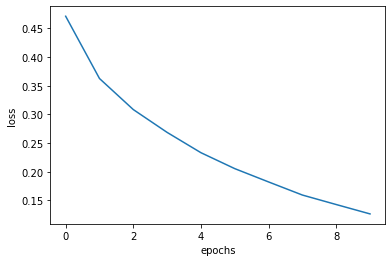

782/782 - 1s - loss: 0.0811 - accuracy: 0.9802 - 932ms/epoch - 1ms/step
782/782 - 1s - loss: 0.7378 - accuracy: 0.7813 - 818ms/epoch - 1ms/step


In [7]:
#2405
import tensorflow as tf
from tensorflow.keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt
#1
top_words    = 1000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)
##print("x_train.shape=",x_train.shape) # (25000,)
##print("x_test.shape=", x_test.shape)  # (25000,)

#2
max_words = 100
x_train= tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_words)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,  maxlen=max_words)
####print("x_train.shape=",x_train.shape) # (25000, 100)
####print("x_test.shape=", x_test.shape)  # (25000, 100)

# one-hot encoding: 'mse', 'categorical_crossentropy'  
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
##print("y_train=", y_train)
##print("y_test=", y_test)

#3
vecor_length = 10   # dimension of the dense embedding
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim =top_words,
                                    output_dim=vecor_length,
                                    input_length=max_words))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=2, activation='softmax'))
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=0)
loss = ret.history['loss']
plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

#4
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
